# life cycle of ML model

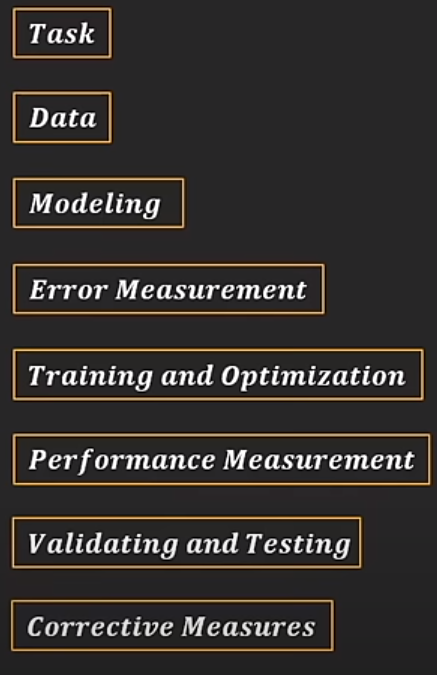

In [41]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# data preprocessing

In [3]:
df=pd.read_csv("dataset.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


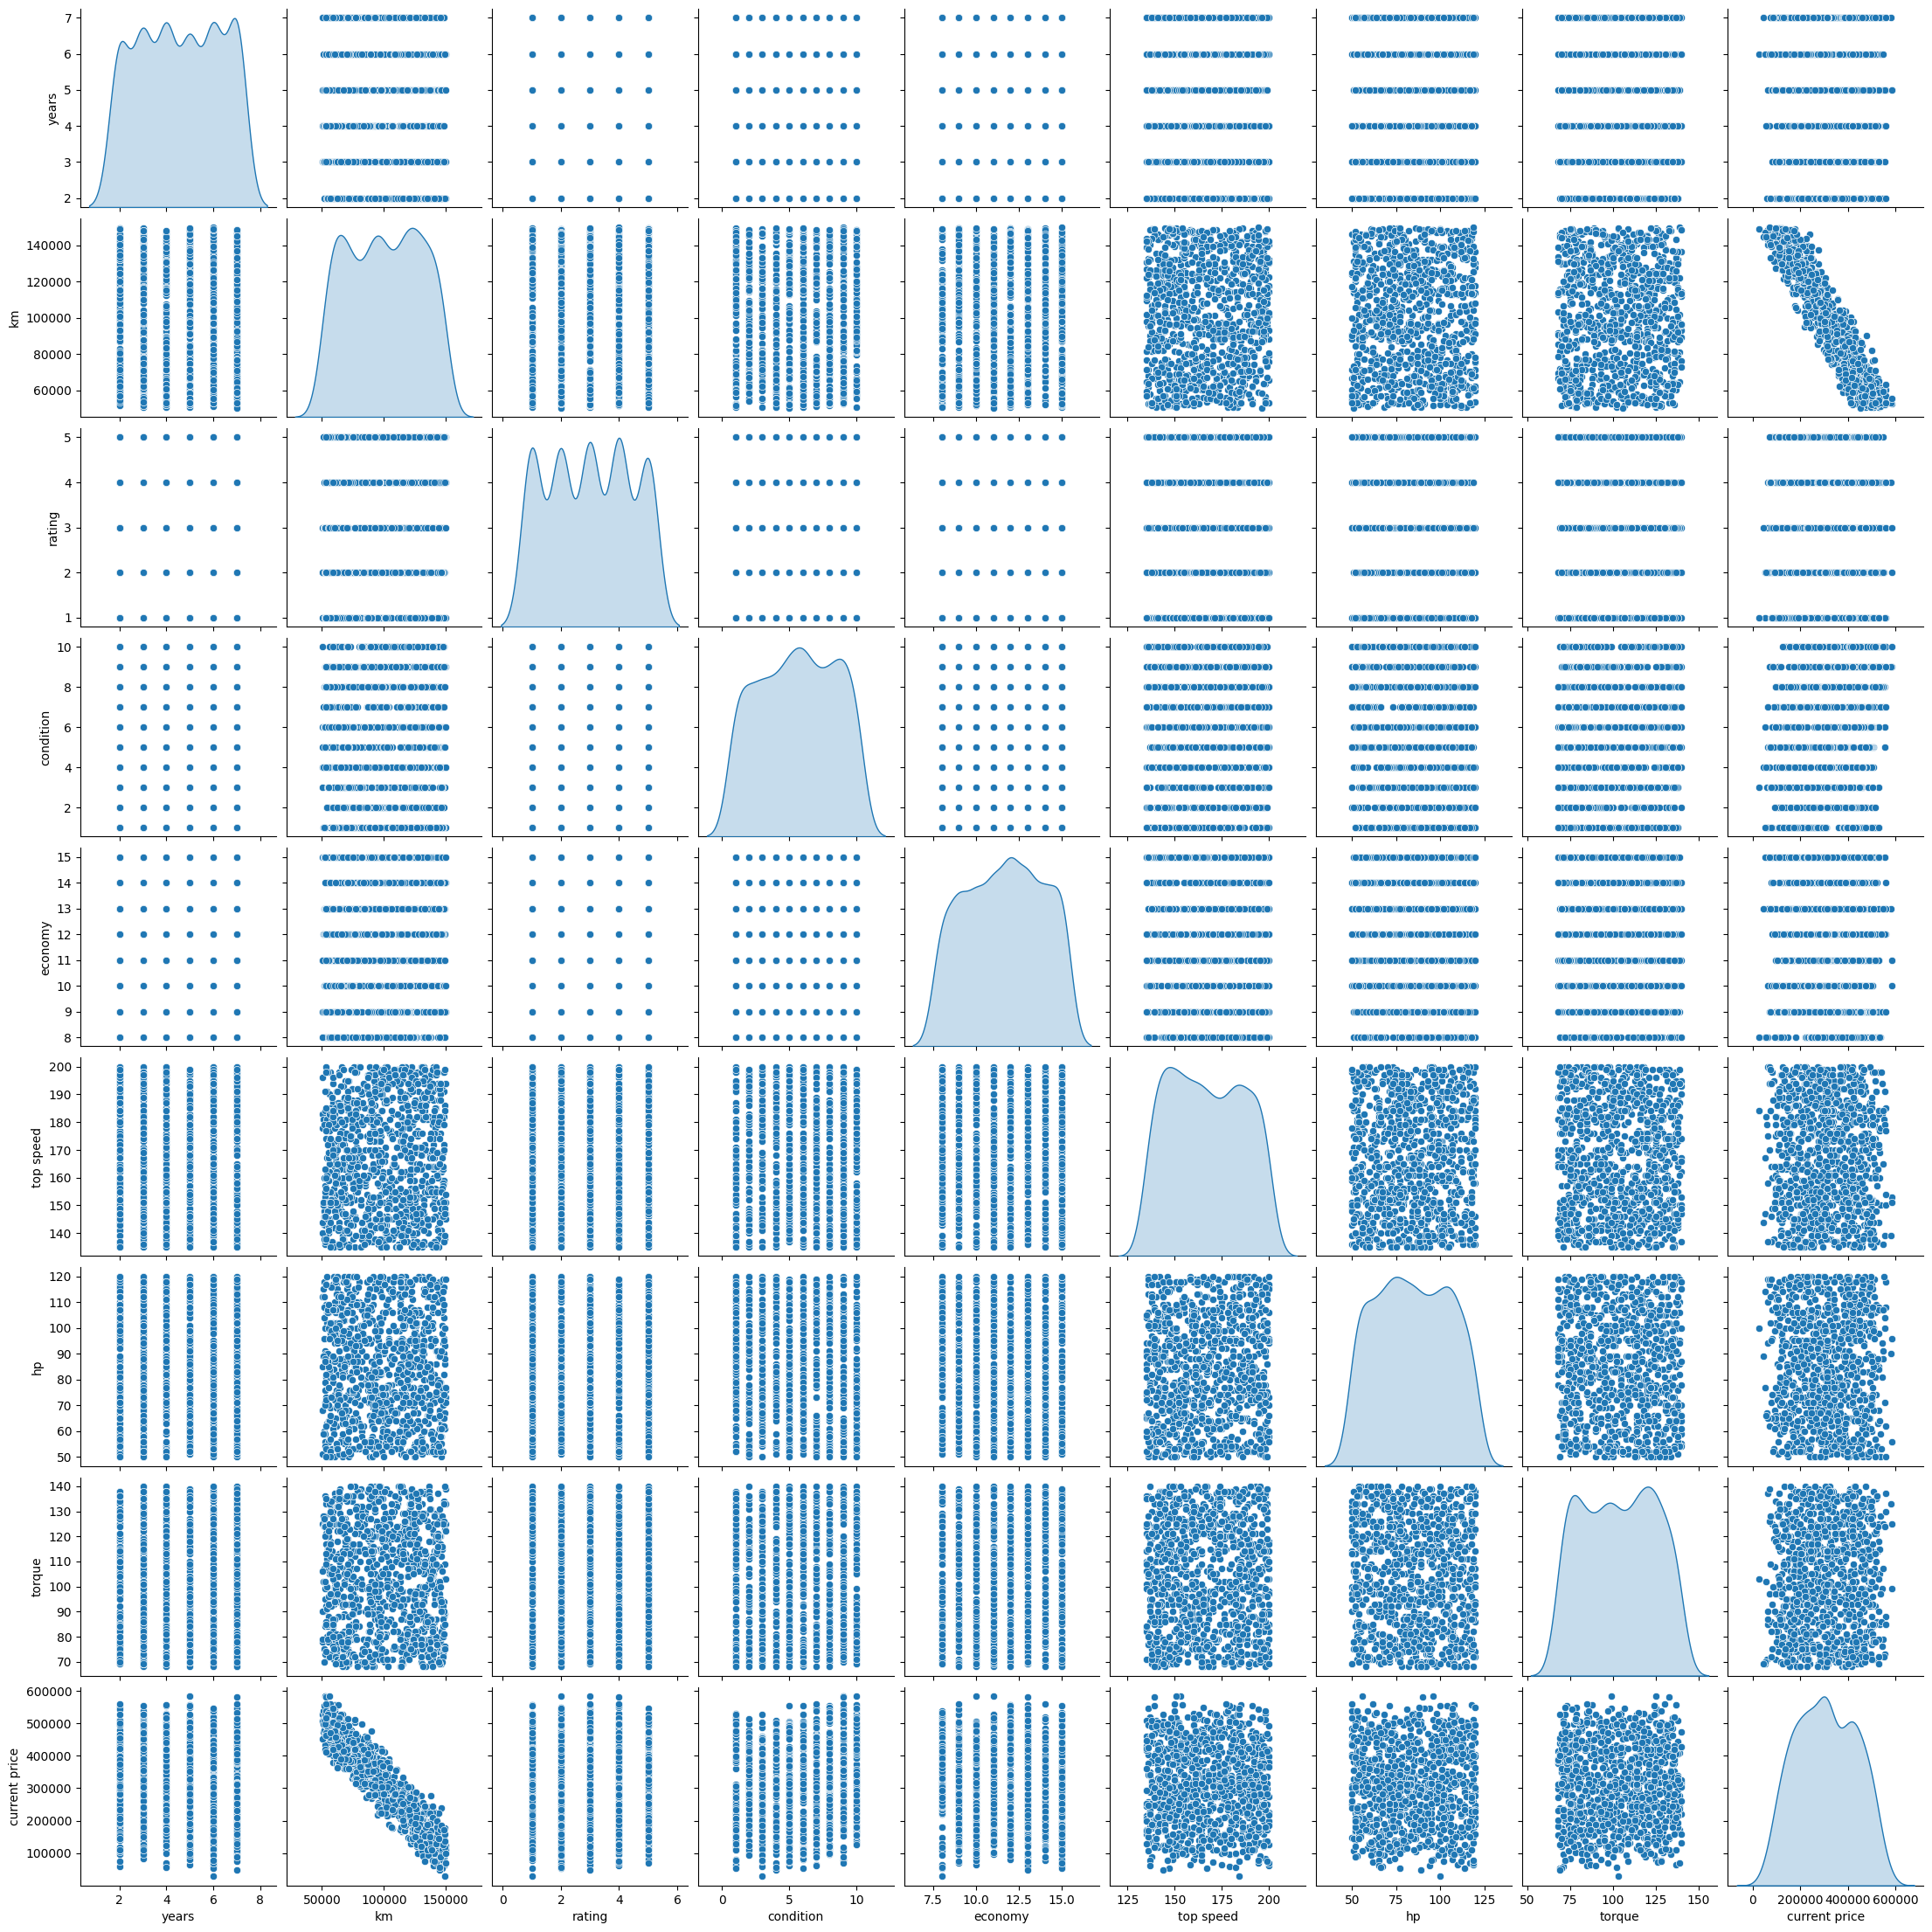

In [4]:
sns.pairplot(df[[	"years"	,"km"	,"rating"	,"condition"	,"economy"	,"top speed"	,"hp"	,"torque"	,"current price"]], diag_kind="kde")

In [5]:
tensor=tf.constant(df)
tensor=tf.cast(tensor,tf.float32)
print(tensor.shape)

(1000, 12)


In [6]:
#data before random shuffling
print(tensor[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [7]:
#data after random shuffele
tensor=tf.random.shuffle(tensor)
print(tensor[:5])

tf.Tensor(
[[8.940000e+02 6.236070e+05 8.477660e+05 5.000000e+00 8.466200e+04
  4.000000e+00 2.000000e+00 1.300000e+01 1.460000e+02 5.200000e+01
  1.130000e+02 3.962440e+05]
 [2.210000e+02 6.332270e+05 8.381440e+05 7.000000e+00 5.578900e+04
  3.000000e+00 7.000000e+00 1.100000e+01 1.620000e+02 8.100000e+01
  1.050000e+02 5.128855e+05]
 [4.750000e+02 5.980990e+05 7.652900e+05 7.000000e+00 6.752000e+04
  2.000000e+00 9.000000e+00 9.000000e+00 1.410000e+02 1.030000e+02
  7.500000e+01 4.329515e+05]
 [8.710000e+02 6.481990e+05 8.415410e+05 7.000000e+00 1.211140e+05
  2.000000e+00 5.000000e+00 1.500000e+01 1.610000e+02 9.500000e+01
  7.500000e+01 2.538670e+05]
 [6.410000e+02 5.483490e+05 8.549640e+05 2.000000e+00 5.986400e+04
  3.000000e+00 6.000000e+00 8.000000e+00 1.520000e+02 6.300000e+01
  7.500000e+01 4.663710e+05]], shape=(5, 12), dtype=float32)


In [8]:
X=tensor[:,3:-1]
print(X.shape)

(1000, 8)


In [9]:
Y=tensor[:,-1]
Y=tf.expand_dims(Y,axis=-1)
print(Y.shape)
Y[0:5]

(1000, 1)


<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[396244. ],
       [512885.5],
       [432951.5],
       [253867. ],
       [466371. ]], dtype=float32)>

# normalizing the data

In [10]:
#4:45:00
#TEST BLOCK  - 1

#by defining axis=-1, we mean that we perform normalization for each set of columns seperately
normal=Normalization(axis=-1,mean=5,variance=4)

Xnew=tf.constant([[3,4,5,6,7],[4,5,6,7,8]])
# print(f"the output for first normalization is :\n{normal(Xnew)}")



#TEST BLOCK - 2 
#by using the adapt function, the entire data normaization is carried out automatically
normal=Normalization()

Xnew=tf.constant([[3,4,5,6,7],[4,5,6,7,8]])
normal.adapt(Xnew)
print(f"the output for second normzlization is :\n {normal(Xnew)}")


the output for second normzlization is :
 [[-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]


In [11]:
print(X.shape)
# we are going to perform normalization for each of the 8 columns

(1000, 8)


In [53]:
TRAIN_RATIO=0.8
VAL_RATION=0.1
TEST_RATION=0.1
DATASET_SIZE=len(X)

In [61]:
Xtrain=X[:int(DATASET_SIZE*TRAIN_RATIO)]
Ytrain=Y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(Xtrain.shape)
print(Ytrain.shape)

(800, 8)
(800, 1)


In [62]:
Xval=X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATION+TRAIN_RATIO))]
Yval=Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATION+TRAIN_RATIO))]
print(Xval.shape)
print(Yval.shape)

(100, 8)
(100, 1)


In [63]:
Xtest=X[int(DATASET_SIZE*(VAL_RATION+TRAIN_RATIO)):]
Ytest=Y[int(DATASET_SIZE*(VAL_RATION+TRAIN_RATIO)):]
print(Xtest.shape)
print(Ytest.shape)

(100, 8)
(100, 1)


In [12]:
normal=Normalization()
normal.adapt(Xtrain)
print(f"first five set of data before normaliztion : \n : {X[:5]}")
print(f"the first five data set after normalization : \n {normal(X)[:5]}")

first five set of data before normaliztion : 
 : [[5.00000e+00 8.46620e+04 4.00000e+00 2.00000e+00 1.30000e+01 1.46000e+02
  5.20000e+01 1.13000e+02]
 [7.00000e+00 5.57890e+04 3.00000e+00 7.00000e+00 1.10000e+01 1.62000e+02
  8.10000e+01 1.05000e+02]
 [7.00000e+00 6.75200e+04 2.00000e+00 9.00000e+00 9.00000e+00 1.41000e+02
  1.03000e+02 7.50000e+01]
 [7.00000e+00 1.21114e+05 2.00000e+00 5.00000e+00 1.50000e+01 1.61000e+02
  9.50000e+01 7.50000e+01]
 [2.00000e+00 5.98640e+04 3.00000e+00 6.00000e+00 8.00000e+00 1.52000e+02
  6.30000e+01 7.50000e+01]]
the first five data set after normalization : 
 [[ 0.25549707 -0.5358494   0.7217796  -1.2723888   0.6167485  -1.0837333
  -1.5870925   0.45500377]
 [ 1.4194925  -1.5268267   0.00855871  0.49875376 -0.28034025 -0.25380328
  -0.17291915  0.07492349]
 [ 1.4194925  -1.124196   -0.70466214  1.2072108  -1.177429   -1.3430865
   0.89990205 -1.3503776 ]
 [ 1.4194925   0.71525395 -0.70466214 -0.20970328  1.5138373  -0.3056739
   0.50978523 -1.350377

In [92]:
#defining the model
model=tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normal,
    Dense(128,activation="relu"),   
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1)
])
model.summary()

d:\work\AIML\Computer_Vision\Computer_vision\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

we have 3 different ways to create tensorflow models: 
1)sequetional API
2)functional API
3)subclassing method

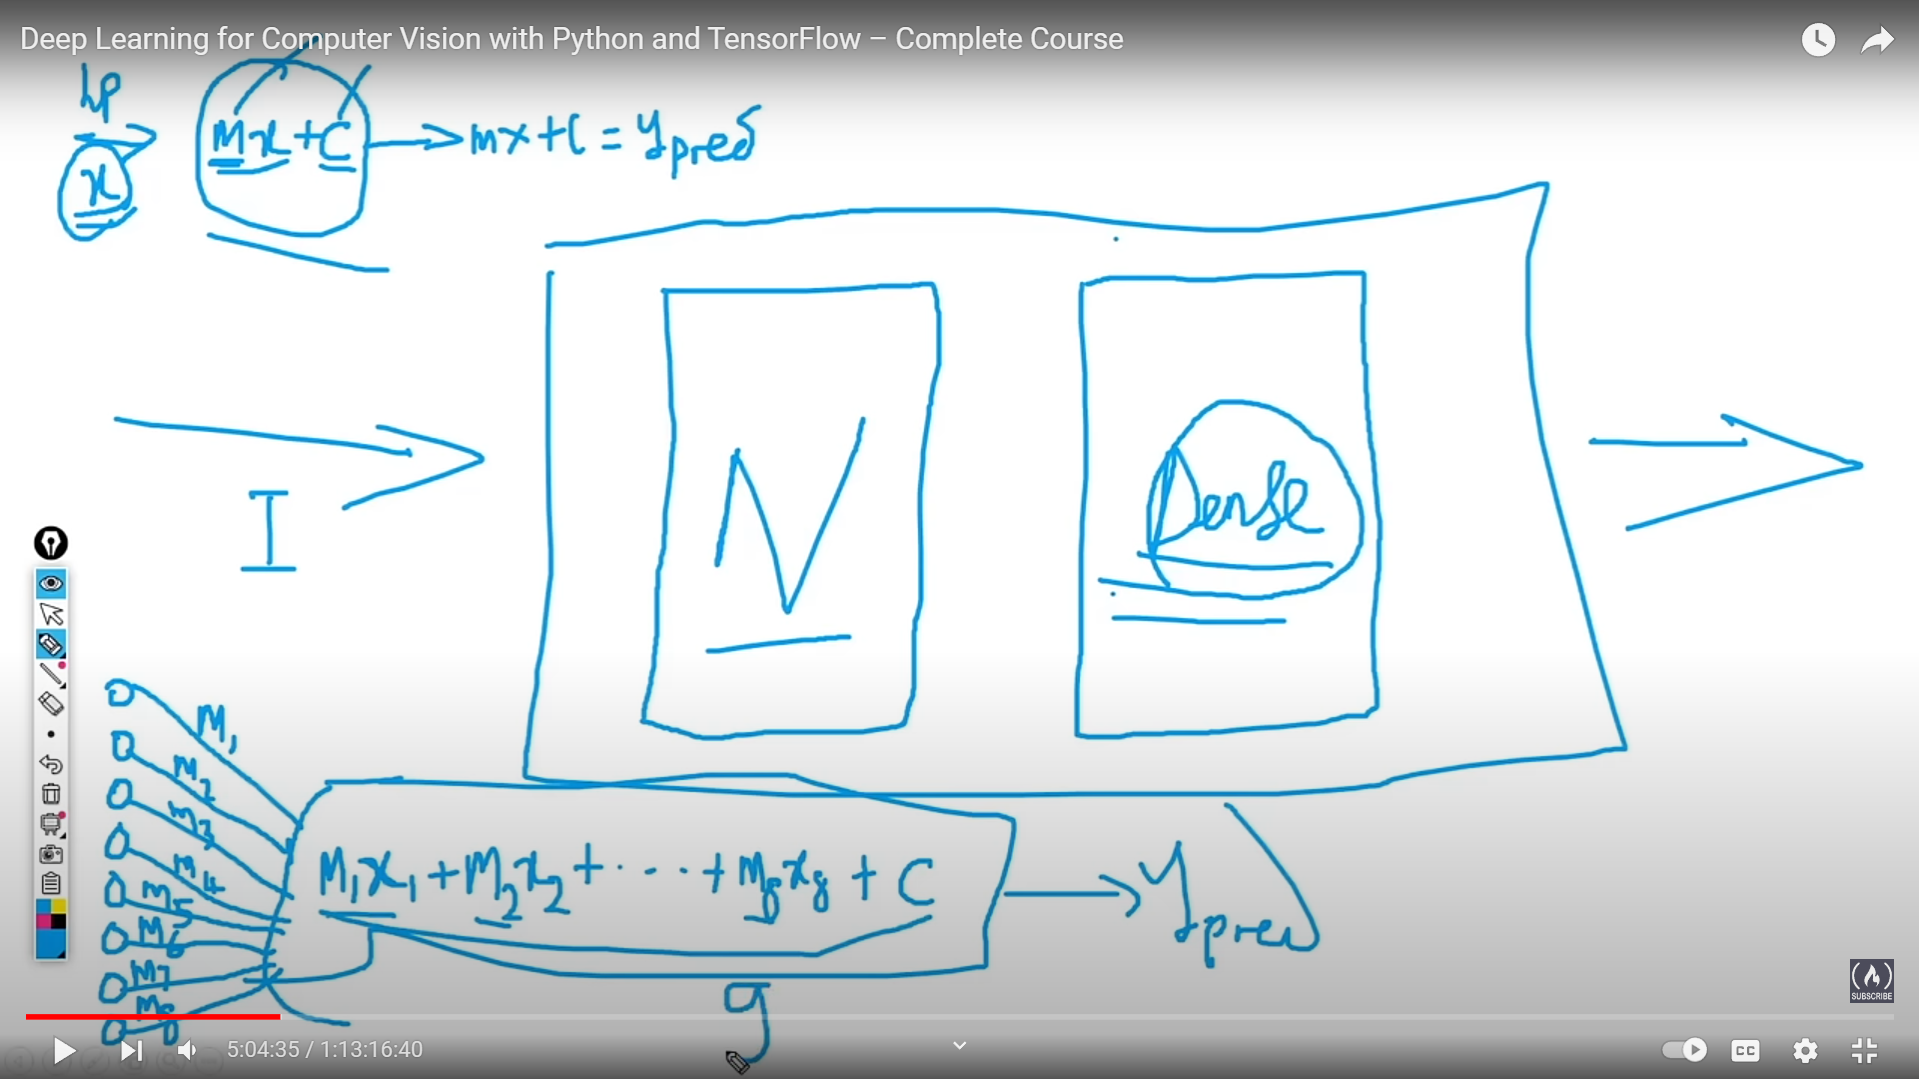

the dense layers, it has weights and bias which are trainable

In [93]:
# #plotting the model
# tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)


# training and mearsurment

In [94]:
model.compile(optimizer=Adam(learning_rate=0.1),loss=MeanAbsoluteError(),metrics=[RootMeanSquaredError()])

In [95]:
history=model.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),epochs=100,verbose=1)

Epoch 1/100


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 228934.2812 - root_mean_squared_error: 270162.5625 - val_loss: 61014.7969 - val_root_mean_squared_error: 75287.5469
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58246.5234 - root_mean_squared_error: 72857.9062 - val_loss: 48593.3594 - val_root_mean_squared_error: 59266.8047
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49618.9141 - root_mean_squared_error: 61954.2930 - val_loss: 45952.2852 - val_root_mean_squared_error: 54183.1602
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41803.3984 - root_mean_squared_error: 51600.8477 - val_loss: 38774.9062 - val_root_mean_squared_error: 47984.5586
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36888.4531 - root_mean_squared_error: 46870.9414 - val_loss: 39661.9844 - val_root_mean_squared_error: 48392.5781
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39424.7617 - root_mean_squared_error: 49250.9258 - val_loss: 41816.7969 - val_root_mea

In [96]:
history.history

{'loss': [147538.46875,
  52307.48046875,
  48120.890625,
  41928.93359375,
  38271.87890625,
  39781.65625,
  39926.1171875,
  40381.23046875,
  40788.75390625,
  41413.5234375,
  44567.28515625,
  42404.99609375,
  38553.6796875,
  37640.890625,
  36450.6015625,
  38033.17578125,
  39317.44921875,
  38515.3359375,
  38281.0,
  40711.03515625,
  38057.171875,
  43745.44140625,
  38819.17578125,
  37567.3125,
  40890.3984375,
  40151.19921875,
  52541.74609375,
  42283.3984375,
  39085.4453125,
  44171.8359375,
  38961.54296875,
  43349.60546875,
  37016.0390625,
  36868.12890625,
  36265.44140625,
  35420.68359375,
  40568.703125,
  35357.08984375,
  40166.78515625,
  37104.61328125,
  35215.7109375,
  48908.765625,
  39028.90625,
  35081.6484375,
  36123.36328125,
  37109.13671875,
  36094.1953125,
  35243.43359375,
  34603.00390625,
  35549.8046875,
  37697.94140625,
  35738.76171875,
  37739.0,
  34249.19140625,
  35652.453125,
  35484.26171875,
  33671.65625,
  35949.25390625,
  3

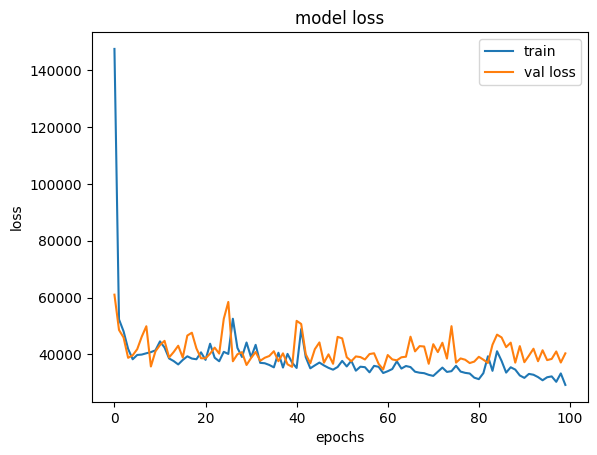

In [97]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train',"val loss"])
plt.show()

# performance measurnment

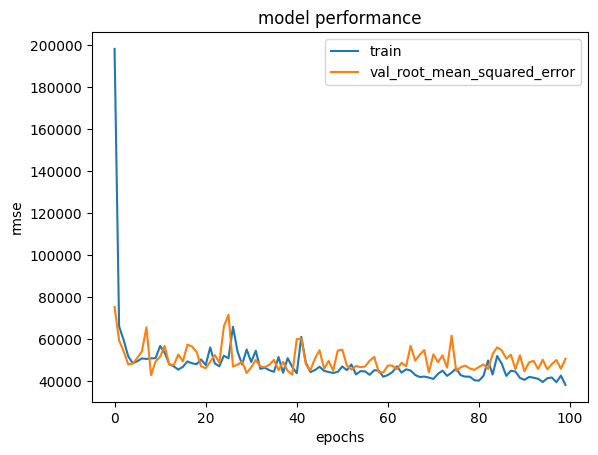

In [98]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("model performance")
plt.xlabel("epochs")
plt.ylabel("rmse")
plt.legend(['train',"val_root_mean_squared_error"])
plt.show()

# validation and testing

In [99]:
model.evaluate(Xtest,Ytest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45014.5430 - root_mean_squared_error: 53582.2930 


[45472.01953125, 53856.11328125]

In [100]:
model.predict(tf.expand_dims(Xtest[0],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[349831.3]], dtype=float32)

In [101]:
Ytest[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([379566.], dtype=float32)>

In [102]:
ypred=list(model.predict(Xtest)[:,0])
y_true=Ytest[:,0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


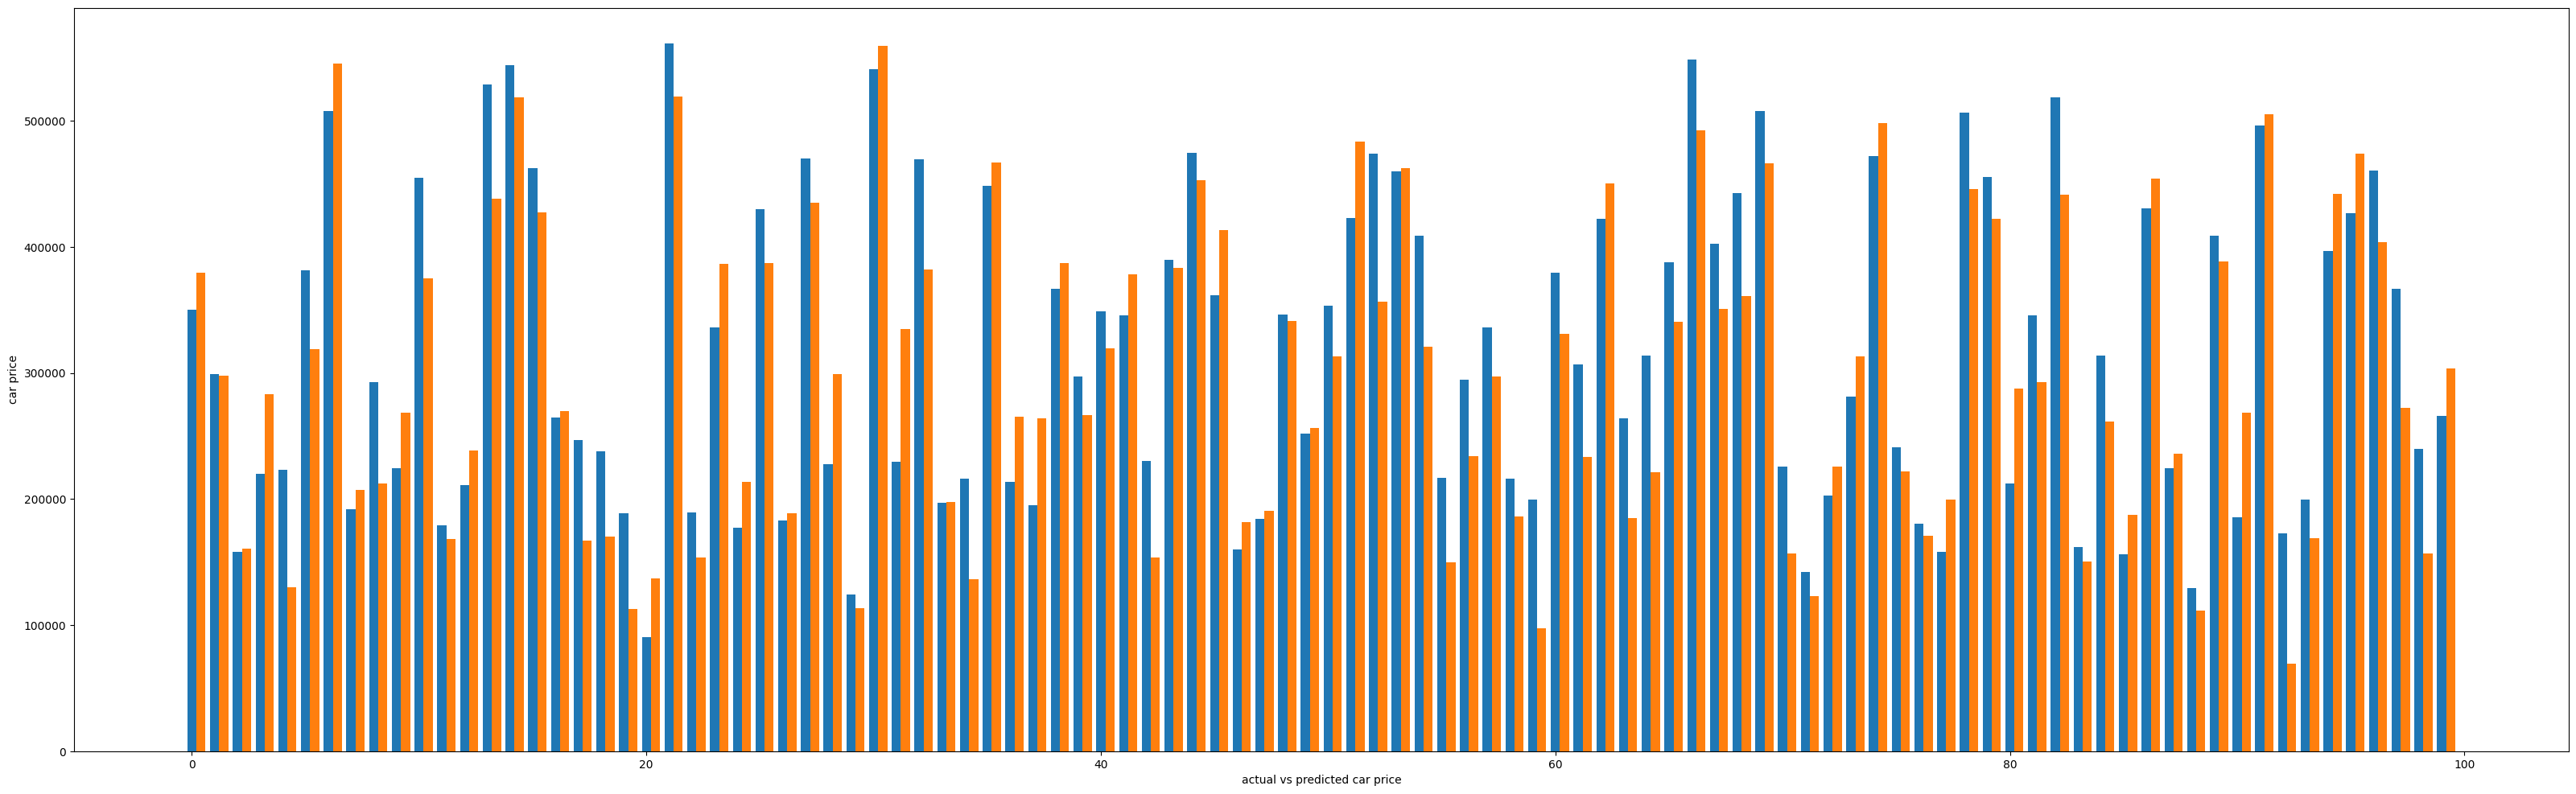

In [103]:
ind=np.arange(100)
plt.figure(figsize=(40,12))

width=0.4

plt.bar(ind,ypred,width,label="predicted car price")
plt.bar(ind+width,y_true,width,label="Actual car price")

plt.xlabel("actual vs predicted car price")
plt.ylabel("car price")

plt.show()